The names of the columns with _ where space character was :
Index(['Title', 'US_Gross', 'Worldwide_Gross', 'US_DVD_Sales',
       'Production_Budget', 'Release_Date', 'MPAA_Rating',
       'Running_Time_(min)', 'Distributor', 'Source', 'Major_Genre',
       'Creative_Type', 'Director', 'Rotten_Tomatoes_Rating', 'IMDB_Rating',
       'IMDB_Votes'],
      dtype='object')
3147
count    3.147000e+03
mean     8.661799e+07
std      1.506973e+08
min      4.010000e+02
25%      8.765672e+06
50%      3.222342e+07
75%      9.878551e+07
max      2.767891e+09
Name: Worldwide_Gross, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


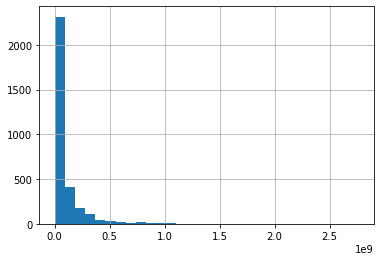

In [7]:
##Erwthsh 4


import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl
import seaborn as sns #A more fancy plotting library
import numpy as np
import copy
import scipy as sp #library for scientific computations
from scipy import stats #The statistics part of the library
from datetime import datetime



df = pd.read_csv("movies.csv")
df.columns = df.columns.str.replace(' ','_')
print("The names of the columns with _ where space character was :")
print(df.columns)

dfGross = df.Worldwide_Gross[df.Worldwide_Gross < 'A' ] #Filtering Unknowns
dfGross = dfGross.astype(float).dropna()
dfGross = dfGross[dfGross>0]
print(len(dfGross))
print(dfGross.describe())
print(dfGross.hist(bins=30))


count    2321.000000
mean       54.336924
std        28.076593
min         1.000000
25%        30.000000
50%        55.000000
75%        80.000000
max       100.000000
Name: Rotten_Tomatoes_Rating, dtype: float64


c:\Users\vangelis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


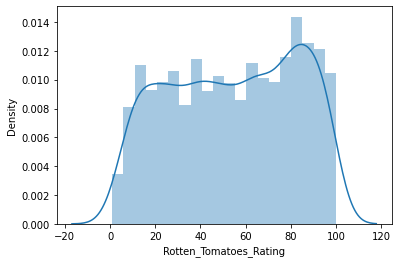

In [8]:
notnanRotten = df.Rotten_Tomatoes_Rating.notnull()
print(df.Rotten_Tomatoes_Rating[notnanRotten].describe())
sns.distplot(df.Rotten_Tomatoes_Rating[notnanRotten],bins=20)
nan =  df.Rotten_Tomatoes_Rating != df.Rotten_Tomatoes_Rating

count    2988.000000
mean        6.283467
std         1.252290
min         1.400000
25%         5.600000
50%         6.400000
75%         7.200000
max         9.200000
Name: IMDB_Rating, dtype: float64


c:\Users\vangelis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IMDB_Rating', ylabel='Density'>

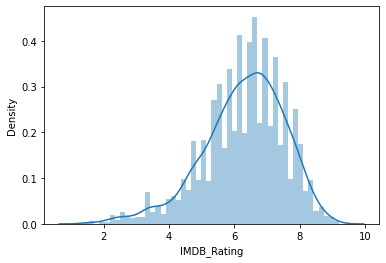

In [9]:
notnanIMDB = df.IMDB_Rating.notnull()
print(df.IMDB_Rating[notnanIMDB].describe())
sns.distplot(df.IMDB_Rating[notnanIMDB],bins=50)

count      2988.000000
mean      29908.644578
std       44937.582335
min          18.000000
25%        4828.500000
50%       15106.000000
75%       35810.500000
max      519541.000000
Name: IMDB_Votes, dtype: float64


c:\Users\vangelis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2988

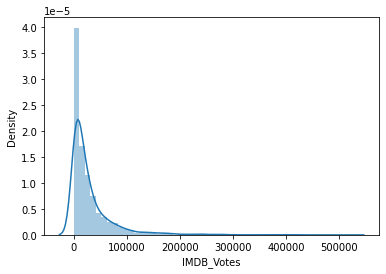

In [10]:
notnanVotes = df.IMDB_Votes.notnull()
print(df.IMDB_Votes[notnanVotes].describe())
sns.distplot(df.IMDB_Votes[notnanVotes],bins=50)
sum(notnanVotes)

Major_Genre
Action                 420
Adventure              274
Black Comedy            36
Comedy                 675
Concert/Performance      5
Documentary             43
Drama                  789
Horror                 219
Musical                 53
Romantic Comedy        137
Thriller/Suspense      239
Western                 36
Name: Title, dtype: int64


<AxesSubplot:xlabel='Title', ylabel='Major_Genre'>

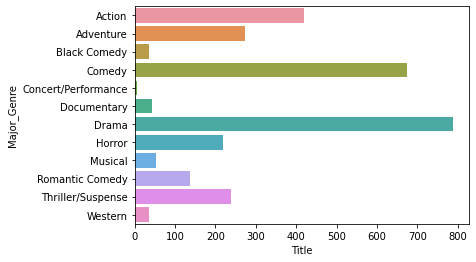

In [11]:
majorGenre_groups = df.groupby('Major_Genre')
countMovies =majorGenre_groups.Title.count()
print(countMovies)
sns.barplot(x =countMovies,y = countMovies.index,data=df)

c:\Users\vangelis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


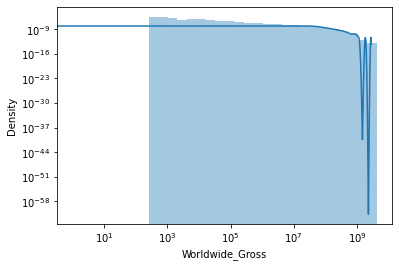

In [12]:
def getBins(power,rangePower):
    bins=[]
    for i in range(0,rangePower+1):
        bins.append(power**i)
    return bins

def getAvgBins(bins,rangePower):
    avgBins=[]
    for i in range(0,rangePower):
        avgBins.append((bins[i]+bins[i+1])//2)
    avgBins.append(0)
    return avgBins


bins1 = getBins(2,32)
avgbins1 = getAvgBins(bins1,32)
ax = sns.distplot(dfGross,bins=bins1)
ax.set_yscale('log')
ax.set_xscale('log')

c:\Users\vangelis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


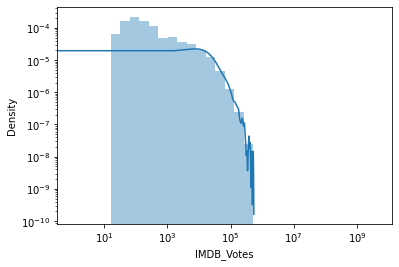

In [13]:
bins2 = getBins(2,19)
avgbins2 = getAvgBins(bins2,19)
ax = sns.distplot(df.IMDB_Votes.astype(float),bins=bins1)
ax.set_yscale('log')
ax.set_xscale('log')

C:\Users\vangelis\AppData\Local\Temp\ipykernel_2052\4051493767.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfx.avgbins = dfx.Average_Gross.astype(float)


          bins  Average_Gross  Movies_Per_Bin
8          256            384               2
9          512            768               6
10        1024           1536               4
11        2048           3072               2
12        4096           6144              10
13        8192          12288              16
14       16384          24576              25
15       32768          49152              24
16       65536          98304              40
17      131072         196608              54
18      262144         393216              60
19      524288         786432              68
20     1048576        1572864             100
21     2097152        3145728             136
22     4194304        6291456             228
23     8388608       12582912             389
24    16777216       25165824             446
25    33554432       50331648             498
26    67108864      100663296             434
27   134217728      201326592             348
28   268435456      402653184     

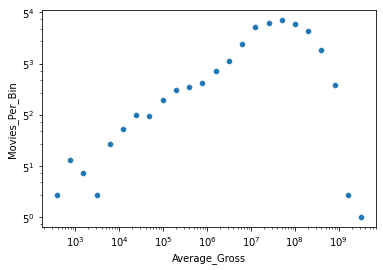

In [20]:
def countMoviesPerBin(dfattribute,bins,movies_Per_Bin):
    for j in range(1,len(bins)-1):
        movies_Per_Bin[j] = dfattribute[(dfattribute > bins1[j]) &(dfattribute < bins[j+1])].count() 


x = {'bins': bins1 , 'Average_Gross': avgbins1}
dfx = pd.DataFrame(data=x)
dfx['Movies_Per_Bin'] = [0 for i in range(33)]
countMoviesPerBin(dfGross,bins1,dfx.Movies_Per_Bin)
dfx.avgbins = dfx.Average_Gross.astype(float)

print(dfx[dfx.Movies_Per_Bin>0])

splot = sns.scatterplot(x= dfx.Average_Gross[dfx.Average_Gross>0], y= dfx.Movies_Per_Bin[dfx.Movies_Per_Bin>0], data = dfx)

splot.set_xscale('log',base=10)
splot.set_yscale('log',base=5)

     bins2  avgbins2  Movies_Per_Bin2
4       16        24                3
5       32        48               16
6       64        96               42
7      128       192               61
8      256       384               88
9      512       768               76
10    1024      1536              162
11    2048      3072              223
12    4096      6144              392
13    8192     12288              503
14   16384     24576              610
15   32768     49152              448
16   65536     98304              249
17  131072    196608               95
18  262144    393216               19


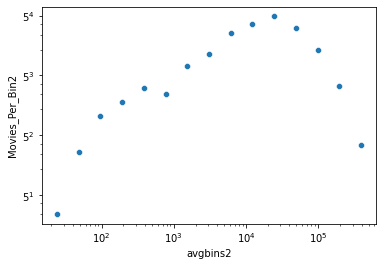

In [22]:
y = {'bins2': bins2 , 'avgbins2': avgbins2}

dfy = pd.DataFrame(data=y)
dfy['Movies_Per_Bin2'] = [0 for i in range(20)]
countMoviesPerBin(df.IMDB_Votes,bins2,dfy.Movies_Per_Bin2)
splot = sns.scatterplot(x= dfy.avgbins2[dfy.avgbins2>0], y= dfy.Movies_Per_Bin2[dfy.Movies_Per_Bin2>0], data = dfy)

print(dfy[dfy.Movies_Per_Bin2>0])
splot.set_xscale('log',base=10)
splot.set_yscale('log',base=5)

SpearmanrResult(correlation=0.11035257584054317, pvalue=1.0808331543328857e-07)
(0.1599629593542139, 1.0994133119606637e-14)


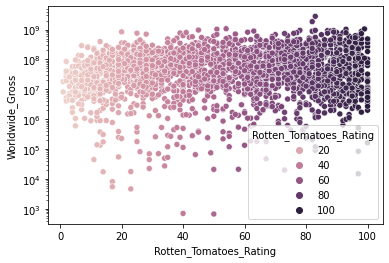

In [24]:
#######2o erwthma#########################
splot1 = sns.scatterplot(x=df.Rotten_Tomatoes_Rating[notnanRotten], y=  dfGross,hue= df.Rotten_Tomatoes_Rating[notnanRotten], data = df)
splot1.set_yscale('log',base=10)
w = {'gross': dfGross.dropna() , 'rotten': df.Rotten_Tomatoes_Rating}

dfw = pd.DataFrame(data=w)
dfw = dfw.dropna()
print(stats.spearmanr( dfw.gross.astype('longdouble'),dfw.rotten))
print(stats.pearsonr( dfw.gross.astype('longdouble'),dfw.rotten))

      imdbR        gross
0       6.1     146083.0
1       6.9      10876.0
2       6.8     203134.0
4       3.4    1087521.0
6       7.7      44705.0
...     ...          ...
3195    7.8   98690286.0
3196    7.0   36851125.0
3198    3.4   12506188.0
3199    5.7  141475336.0
3200    6.7  233700000.0

[2956 rows x 2 columns]
SpearmanrResult(correlation=0.14314484667698174, pvalue=5.2963515197271755e-15)
(0.19831276108064755, 1.3468944264255108e-27)


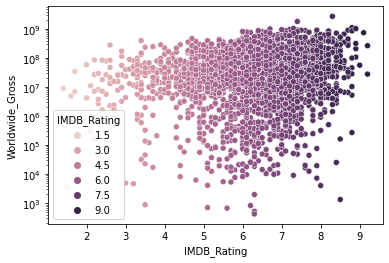

In [26]:
splot2 = sns.scatterplot(x=df.IMDB_Rating[notnanIMDB], y=  dfGross,hue=df.IMDB_Rating[notnanIMDB], data = df)
splot2.set_yscale('log',base=10)
a = {'imdbR': df.IMDB_Rating , 'gross': dfGross}

dfa = pd.DataFrame(data=a)
dfa = dfa.dropna()
print(dfa)
print(stats.spearmanr(dfa.imdbR, dfa.gross.astype('longdouble')))
print(stats.pearsonr(dfa.imdbR, dfa.gross.astype('longdouble')))

        imdbV        gross
0      1071.0     146083.0
1       207.0      10876.0
2       865.0     203134.0
4       165.0    1087521.0
6     15133.0      44705.0
...       ...          ...
3195  81629.0   98690286.0
3196  55687.0   36851125.0
3198   7424.0   12506188.0
3199  21161.0  141475336.0
3200   4789.0  233700000.0

[2956 rows x 2 columns]
SpearmanrResult(correlation=0.6542151089219838, pvalue=0.0)
(0.5512717821283767, 1.1232258030356078e-234)


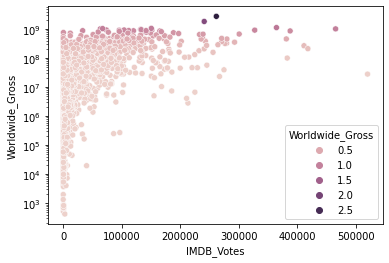

In [27]:
splot3 = sns.scatterplot(x=df.IMDB_Votes[notnanVotes], y= dfGross,hue = dfGross, data = df)
splot3.set_yscale('log',base=10)
b = {'imdbV': df.IMDB_Votes , 'gross':dfGross}

dfb = pd.DataFrame(data=b)
dfb = dfb.dropna()
print(dfb)
print(stats.spearmanr(dfb.imdbV, dfb.gross.astype('longdouble')))
print(stats.pearsonr(dfb.imdbV, dfb.gross.astype('longdouble')))

SpearmanrResult(correlation=0.7765115835122421, pvalue=0.0)
(0.7431180650114806, 0.0)


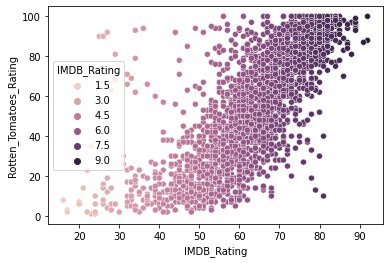

In [28]:
splot4 = sns.scatterplot(x=df.IMDB_Rating[notnanIMDB]*10, y=df.Rotten_Tomatoes_Rating[notnanRotten],hue = df.IMDB_Rating[notnanIMDB], data = df)

c = {'imdbR': df.IMDB_Rating , 'rotten': df.Rotten_Tomatoes_Rating}

dfc = pd.DataFrame(data=c)
dfc = dfc.dropna()
print(stats.spearmanr(dfc.imdbR, dfc.rotten))
print(stats.pearsonr(dfc.imdbR, dfc.rotten))

SpearmanrResult(correlation=0.3122562027210114, pvalue=2.6700559518634912e-52)
(0.33540986024975095, 1.514105904594568e-60)


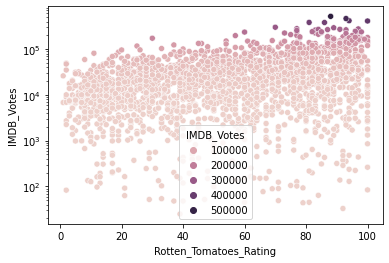

In [30]:
splot5 = sns.scatterplot(x=df.Rotten_Tomatoes_Rating[notnanRotten], y=df.IMDB_Votes[notnanVotes],hue=df.IMDB_Votes[notnanVotes], data = df)

splot5.set_yscale('log',base=10)

d = {'rotten': df.Rotten_Tomatoes_Rating , 'imdbV' : df.IMDB_Votes}

dfd = pd.DataFrame(data=d)
dfd = dfd.dropna()
print(stats.spearmanr(dfd.rotten, dfd.imdbV))
print(stats.pearsonr(dfd.rotten, dfd.imdbV))

SpearmanrResult(correlation=0.46330932018735227, pvalue=6.650042847118796e-159)
(0.46738930847165805, 4.745924545144403e-162)


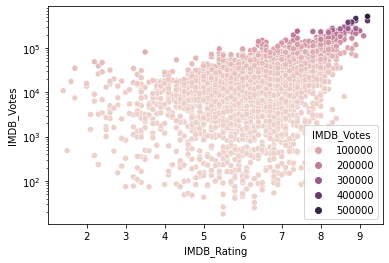

In [31]:
splot6 = sns.scatterplot(x=df.IMDB_Rating[notnanIMDB], y=df.IMDB_Votes[notnanVotes],hue=df.IMDB_Votes[notnanVotes], data = df)
splot6.set_yscale('log',base=10)
e = {'imdbR': df.IMDB_Rating , 'imdbV' : df.IMDB_Votes}

dfe = pd.DataFrame(data=e)
dfe = dfe.dropna()
print(stats.spearmanr(dfe.imdbR, dfe.imdbV))
print(stats.pearsonr(dfe.imdbR, dfe.imdbV))

[144929519.82014388, 242944704.52941176, 23562055.057142857, 75200073.55522388, 30724401.8, 17473610.025, 51693702.36653895, 61390224.741935484, 75093048.03846154, 87254746.48529412, 81268721.85232067, 36149254.19444445]
['Drama' 'Comedy' 'Musical' 'Thriller/Suspense' 'Adventure' 'Action'
 'Romantic Comedy' 'Horror' 'Western' 'Black Comedy' 'Documentary'
 'Concert/Performance']


<AxesSubplot:xlabel='Avg_Gross_Per_Genre', ylabel='Genre'>

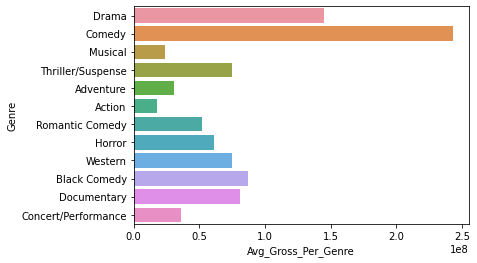

In [32]:
dfGenreGross = {'genre':df.Major_Genre.dropna(),'gross':dfGross}

dfGG = pd.DataFrame(data=dfGenreGross)
dfGG = dfGG.dropna()
groupGenre = dfGG.groupby('genre')
sumGross = groupGenre.gross.sum()

avgGross = sumGross/ groupGenre.gross.count()
avgGrossList =[0 for i in range(len(avgGross))]
for i in range(len(avgGross)):
    avgGrossList[i]=avgGross[i]
print( avgGrossList)
genreList = dfGG.genre.unique()
print(genreList)
dataGG = {'Avg_Gross_Per_Genre': avgGrossList, 'Genre':genreList}
dfdata = pd.DataFrame(data =dataGG)
sns.barplot(x='Avg_Gross_Per_Genre', y= 'Genre',data =dfdata)
#print(stats.ttest_ind(sm,neg,equal_var = False))



Number of movies per decade


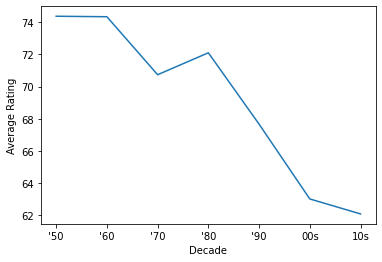

In [33]:
###ERWTHMA 3########

#THE LAST 2 DIGITS OF THE RELEASE DATE SHOWS THE DECADE
f = {'Imdb':df.IMDB_Rating *10,'Year' : [0 for i in range(len(df))] ,'Decade':['0' for i in range(len(df))] }
for i in range(len(df.Release_Date)):
    if(df.Release_Date[i][-2:] < 'A' and df.Release_Date[i][-2:]>='00' and df.Release_Date[i][-1:]>='0'):
        f['Year'][i] = df.Release_Date[i][-2:]
        x = str((int(f['Year'][i])//10) *10)
        if x == '0' :
            f['Decade'][i]= '00'
        else:
            f['Decade'][i]= x
    else:
        f['Year'][i] = np.nan
        f['Decade'][i] = np.nan

########################################################
dff = pd.DataFrame(data=f)
dff = dff.dropna()

decade_groups = dff.groupby('Decade')
print("Number of movies per decade")

decadeBins = ['\'20','\'30','\'40','\'50','\'60','\'70','\'80','\'90','00s','10s']


linep = {'Decade':decadeBins,'Average Rating':decade_groups.Imdb.sum()/decade_groups.Imdb.count(),'Number_Of_Movies':decade_groups.Imdb.count()}

dfImdb = pd.DataFrame(data = linep)
dfImdb = dfImdb[dfImdb.Decade> '\'40']



numb = sns.lineplot(x='Decade',y='Average Rating',data = dfImdb)

#dff = pd.DataFrame(data=f)
#print(dff)


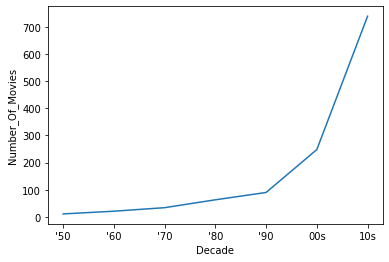

In [34]:
numb2 = sns.lineplot(x='Decade',y='Number_Of_Movies',data = dfImdb)

Major_Genre
Action                 57.189119
Adventure              55.006494
Black Comedy           52.692308
Comedy                 49.287456
Concert/Performance    50.250000
Documentary            44.900000
Drama                  60.982079
Horror                 50.642857
Musical                57.750000
Romantic Comedy        53.789062
Thriller/Suspense      55.490909
Western                65.375000
Name: time, dtype: float64


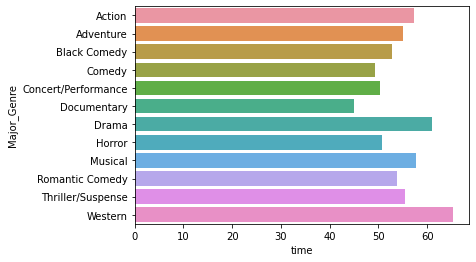

In [35]:
df = df.rename(columns = {'Running_Time_(min)':'time'})
df = df[df.time>0]
group1= df.groupby(df.Major_Genre.dropna())
avgtime = (group1.time.sum()/group1.time.count())/2
sns.barplot(x=avgtime,y=avgtime.index)
print(avgtime)
